In [70]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftshift

In [45]:
DATADIR = Path("/Users/williamjenkins/Research/Projects/BOGP/Data/SWELLEX96/VLA/selected")
contents = np.load(DATADIR / "merged.npz")
x = contents["X"]
t = contents["t"]

In [89]:
M = x.shape[1]
NT = 350
N_snap = data.shape[0] // NT
NFFT = 2 ** 13

In [72]:
fvec = np.linspace(0, 1500 / 2 - 1 / NFFT, NFFT)

x[:, 42] = 0 # Remove corrupted channel
for i in range(NT):
    idx_start = i * N_snap
    idx_end = (i + 1) * N_snap

    X = fftshift(fft(x[idx_start:idx_end], n=NFFT, axis=0))
    

    if i == 1:
        break


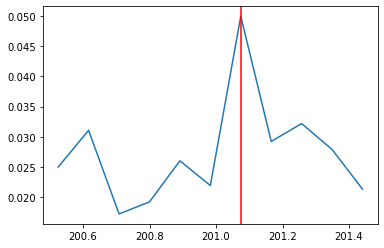

In [111]:
f_lower = 200.5
f_upper = 201.5

selected_ind = (fvec >= f_lower) & (fvec < f_upper)
selected_data = (np.abs(X).sum(axis=1) / M)
selected_data[~selected_ind] = -2009
fbin_index = np.argmax(selected_data)
fbin_index


plt.plot(fvec[selected_ind], selected_data[selected_ind])
plt.axvline(fvec[fbin_index], color="red")